# **Zadanie č.3 (I-SUNS)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, f1_score, r2_score, log_loss, ConfusionMatrixDisplay
from sklearn import preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
import locale as loc
import ast
import os

!pip install pyyaml h5py
pd.set_option("display.max_columns", None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/SUNS/datasets/z3_train.zip
!unzip drive/MyDrive/SUNS/datasets/z3_valid.zip
!unzip drive/MyDrive/SUNS/datasets/z3_test.zip

Výstup streamovania bol skrátený na tento počet posledných riadkov: 5000.
  inflating: z3_train/snowmobile racing/119.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._119.jpg  
  inflating: z3_train/snowmobile racing/092.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._092.jpg  
  inflating: z3_train/snowmobile racing/086.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._086.jpg  
  inflating: z3_train/snowmobile racing/051.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._051.jpg  
  inflating: z3_train/snowmobile racing/045.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._045.jpg  
  inflating: z3_train/snowmobile racing/079.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._079.jpg  
  inflating: z3_train/snowmobile racing/078.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._078.jpg  
  inflating: z3_train/snowmobile racing/044.jpg  
  inflating: __MACOSX/z3_train/snowmobile racing/._044.jpg  
  inflating: z3_train/snowmobile racin

In [ ]:
!rm z3_train/.DS_Store
!rm z3_valid/.DS_Store
!rm z3_test/.DS_Store

rm: cannot remove 'z3_train/.DS_Store': No such file or directory
rm: cannot remove 'z3_valid/.DS_Store': No such file or directory


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_train",
      image_size=(28, 28)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 13572 files belonging to 100 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_valid",
      image_size=(28, 28)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 500 files belonging to 100 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_test",
      image_size=(28, 28)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 500 files belonging to 100 classes.


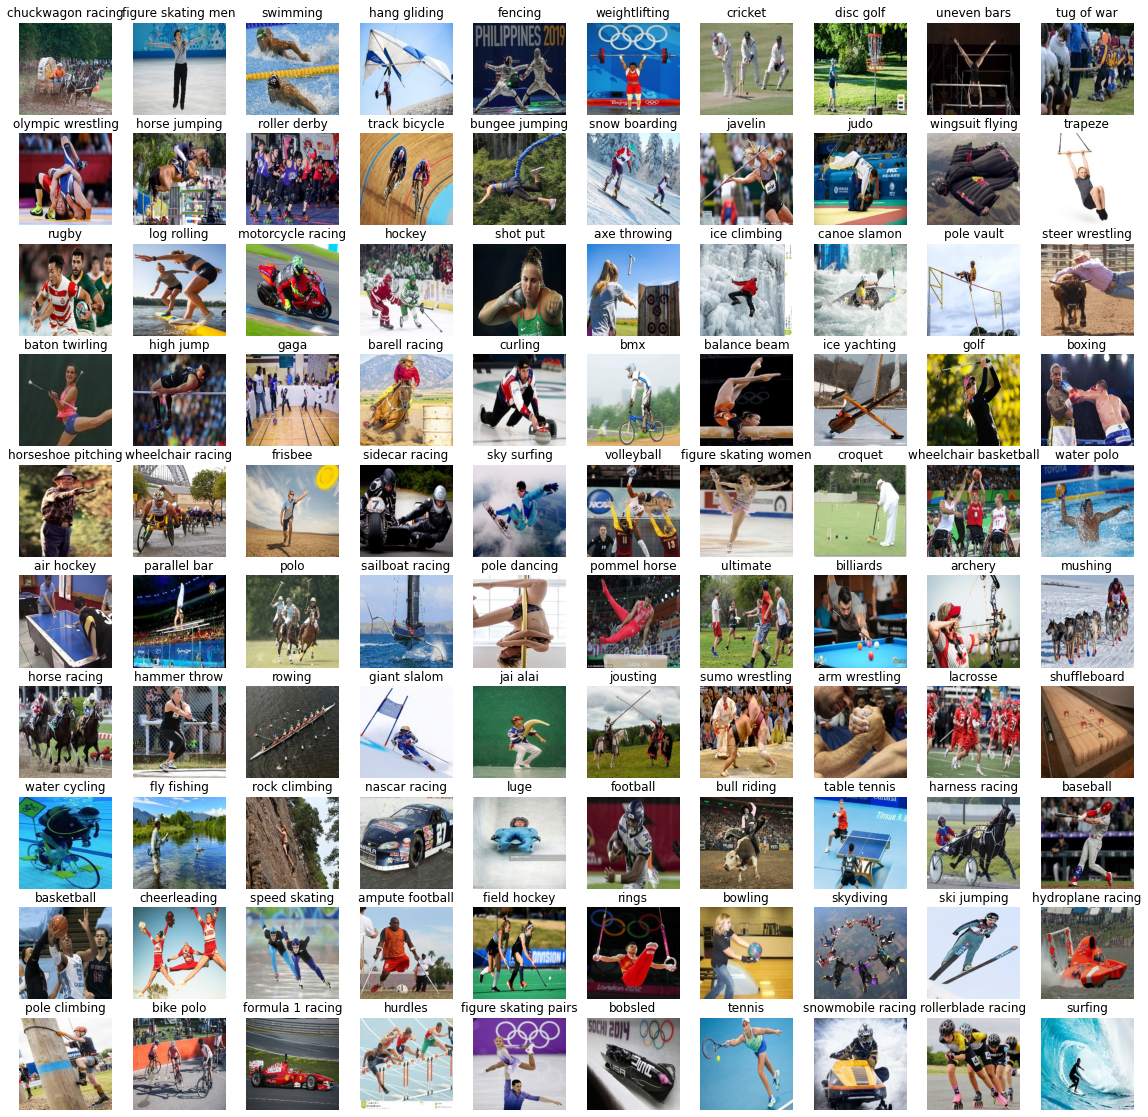

In [ ]:
plt.figure(figsize=(20, 20))
directory=os.listdir('z3_test')
i=0

for each in directory:
    img=mpimg.imread('z3_test/' + each + '/1.jpg')
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(img)
    plt.title(each)
    plt.axis("off")
    i=i+1

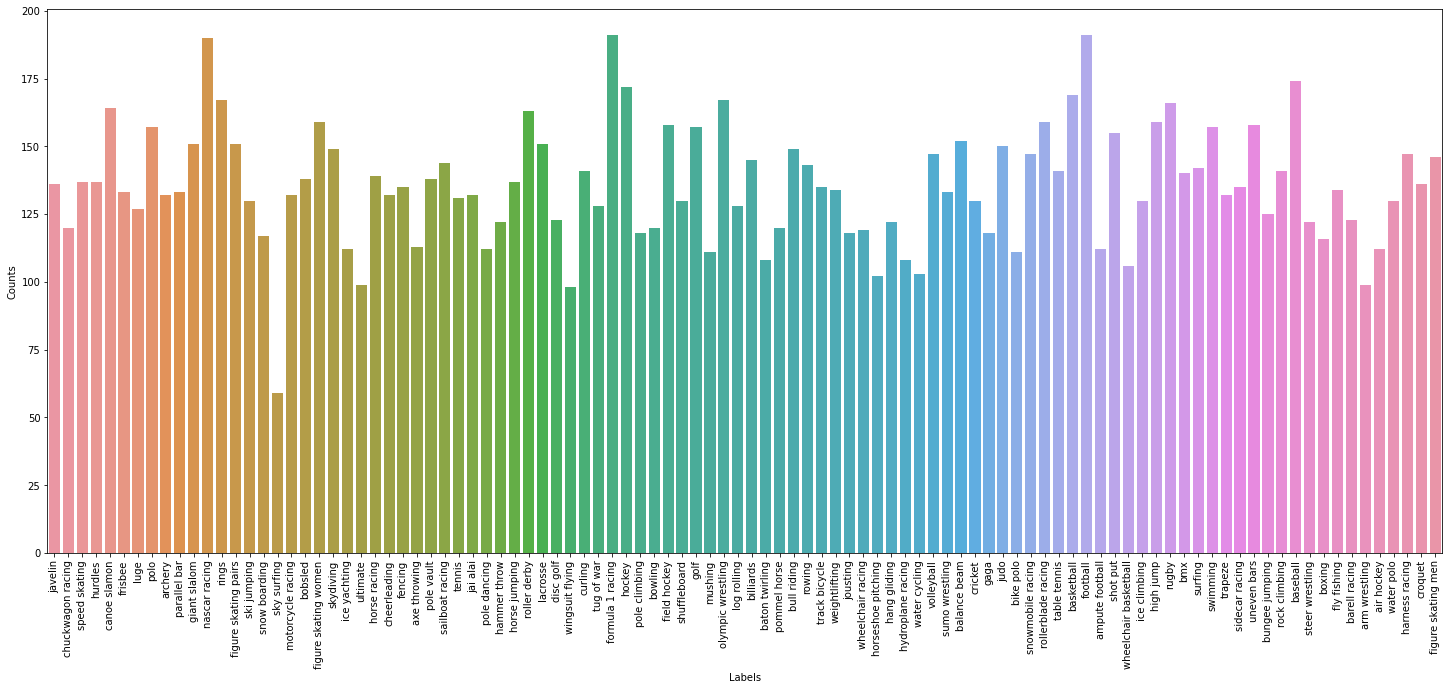

In [ ]:
categories = []
categories_count = []

for class_subdirecotry in os.listdir('z3_train'):
    categories.append(class_subdirecotry)
    count = 0
    for path in os.listdir(os.path.join("z3_train", class_subdirecotry)):
      if os.path.isfile(os.path.join("z3_train", class_subdirecotry, path)):
          count += 1
    categories_count.append(count)

plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('Labels')
sb.barplot(x = categories, y = categories_count) 

In [ ]:
categories = []
red_intensity = []
green_intensity = []
blue_intensity = []

for class_subdirecotry in os.listdir('z3_valid'):
    categories.append(class_subdirecotry)
    red_intensity_tmp = 0
    green_intensity_tmp = 0
    blue_intensity_tmp = 0
    for path in os.listdir(os.path.join("z3_valid", class_subdirecotry)):
        img = plt.imread(os.path.join("z3_valid", class_subdirecotry, path))
        red_tmp = 0
        green_tmp = 0
        blue_tmp = 0
        for y in range(224):
            for x in range(224):
                if(len(img.shape) == 3):
                    red_tmp = red_tmp + img[x, y][0]
                    green_tmp = green_tmp + img[x, y][1]
                    blue_tmp = blue_tmp + img[x, y][2]
        red_intensity_tmp = red_intensity_tmp + red_tmp
        green_intensity_tmp = green_intensity_tmp + green_tmp
        blue_intensity_tmp = blue_intensity_tmp + blue_tmp   
    red_intensity.append(red_intensity_tmp)
    green_intensity.append(green_intensity_tmp)
    blue_intensity.append(blue_intensity_tmp)  

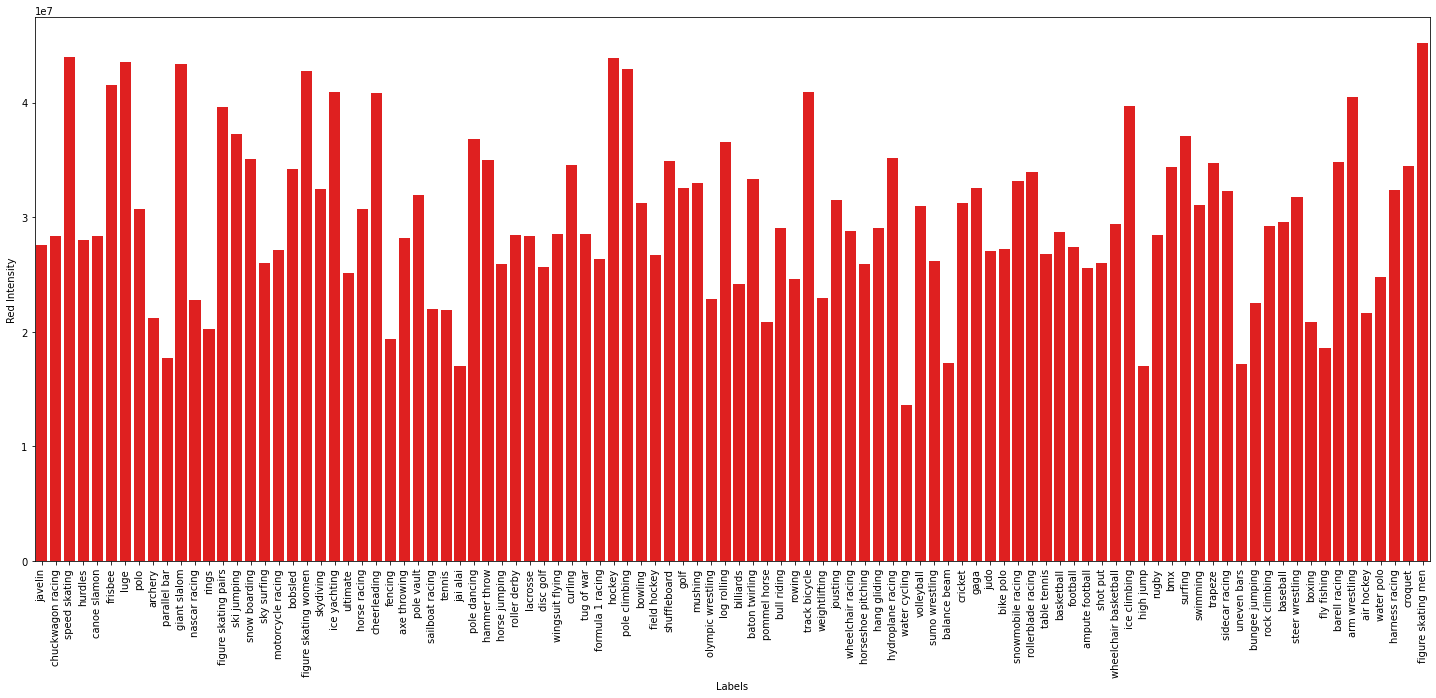

In [ ]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.ylabel('Red Intensity')
plt.xlabel('Labels')
sb.barplot(x = categories, y = red_intensity, color="red") 

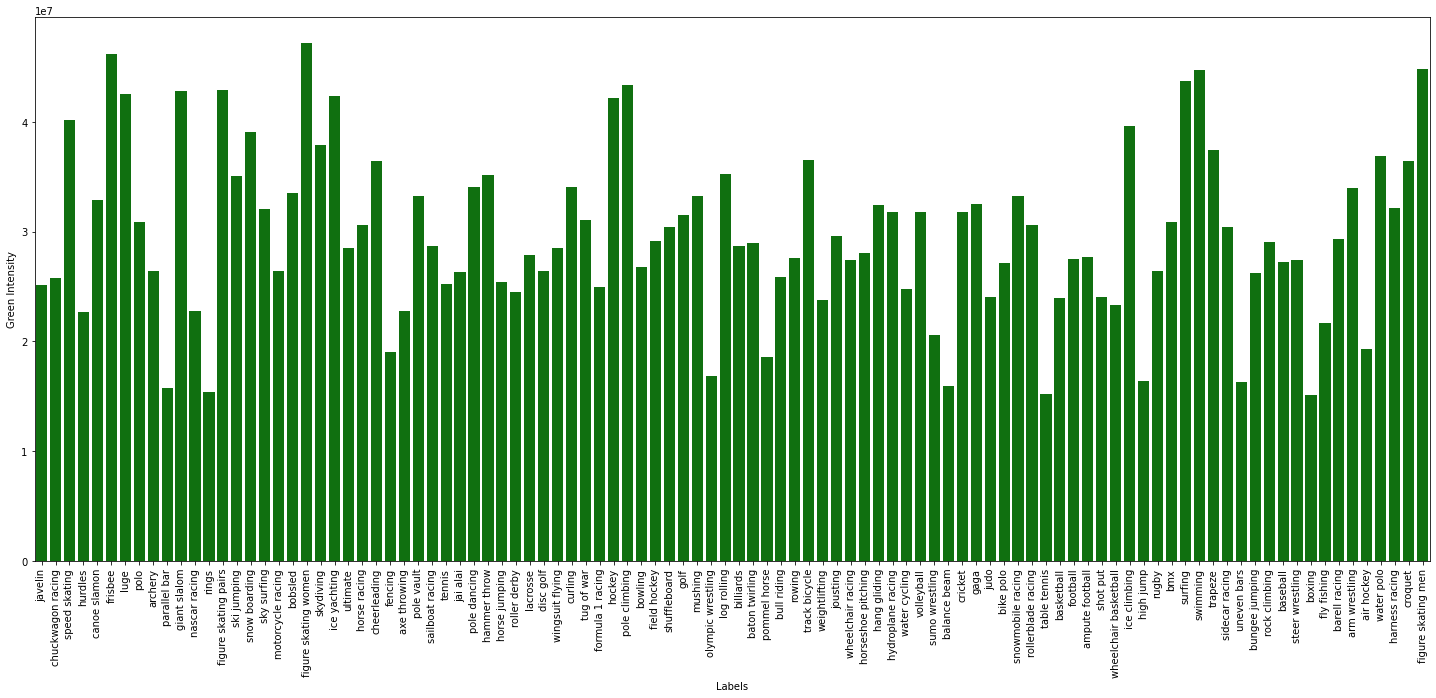

In [ ]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.ylabel('Green Intensity')
plt.xlabel('Labels')
sb.barplot(x = categories, y = green_intensity, color="green") 

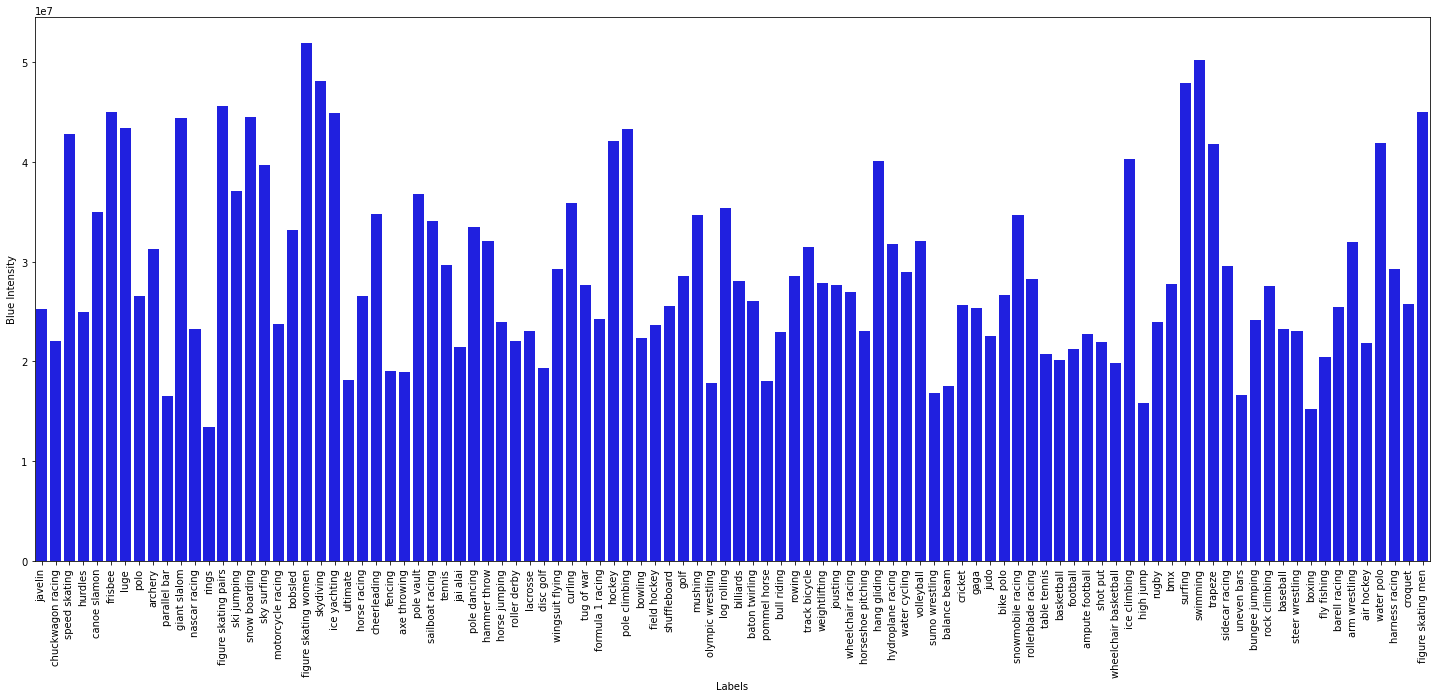

In [ ]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.ylabel('Blue Intensity')
plt.xlabel('Labels')
sb.barplot(x = categories, y = blue_intensity, color="blue") 

In [ ]:
resnet50_test_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_test",
      image_size=(224, 224)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 500 files belonging to 100 classes.


In [ ]:
resnet50_cnn_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 0s 0us/step


In [ ]:
y_pred = []

for image_batch, label_batch in resnet50_test_ds: 
   preds = tf.keras.applications.resnet50.decode_predictions(resnet50_cnn_model.predict(image_batch, verbose=0), top=10)
   for i in preds:
      for j in i:
          y_pred.append(j[1])

In [ ]:
dict_y_pred = {i:y_pred.count(i) for i in y_pred}
dict_y_pred_keys = list(dict_y_pred.keys())
dict_y_pred_values = list(dict_y_pred.values())

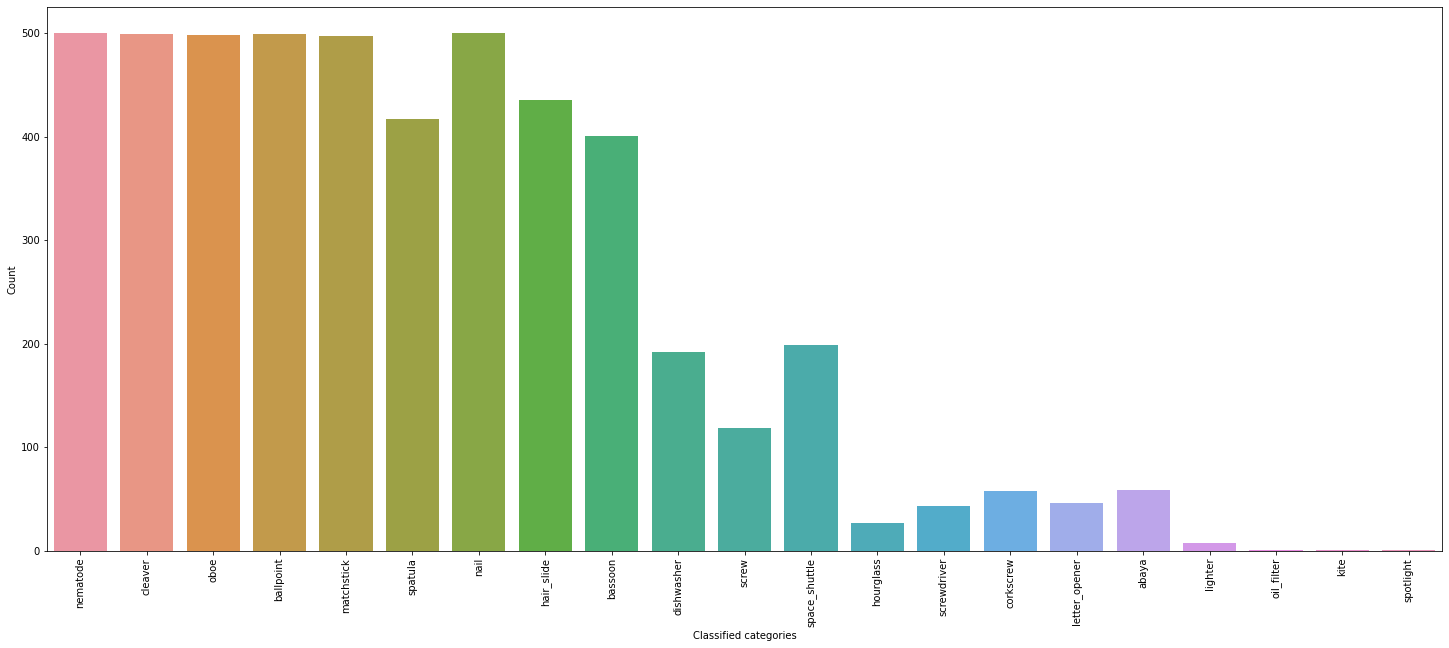

In [ ]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Classified categories')
sb.barplot(x = dict_y_pred_keys, y = dict_y_pred_values) 

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation="relu"))
cnn_model.add(layers.Dense(100, activation="softmax"))

In [ ]:
cnn_model.compile(
      optimizer="adam",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn_model_history = cnn_model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=50
)
print(cnn_model_history.history)

Epoch 1/50
425/425 [==============================] - 27s 60ms/step - loss: 4.3580 - accuracy: 0.0376 - val_loss: 4.0474 - val_accuracy: 0.0680
Epoch 2/50
425/425 [==============================] - 27s 62ms/step - loss: 3.8925 - accuracy: 0.0916 - val_loss: 3.7326 - val_accuracy: 0.1360
Epoch 3/50
425/425 [==============================] - 26s 61ms/step - loss: 3.5662 - accuracy: 0.1423 - val_loss: 3.3513 - val_accuracy: 0.1980
Epoch 4/50
425/425 [==============================] - 31s 71ms/step - loss: 3.2888 - accuracy: 0.1913 - val_loss: 3.1622 - val_accuracy: 0.2380
Epoch 5/50
425/425 [==============================] - 28s 67ms/step - loss: 3.0726 - accuracy: 0.2320 - val_loss: 2.9072 - val_accuracy: 0.2940
Epoch 6/50
425/425 [==============================] - 27s 62ms/step - loss: 2.9059 - accuracy: 0.2663 - val_loss: 2.8367 - val_accuracy: 0.3100
Epoch 7/50
425/425 [==============================] - 26s 61ms/step - loss: 2.7743 - accuracy: 0.2938 - val_loss: 2.8351 - val_accuracy:

In [ ]:
cnn_model.evaluate(test_ds)

16/16 [==============================] - 1s 36ms/step - loss: 5.8218 - accuracy: 0.3240


[5.82184362411499, 0.3240000009536743]

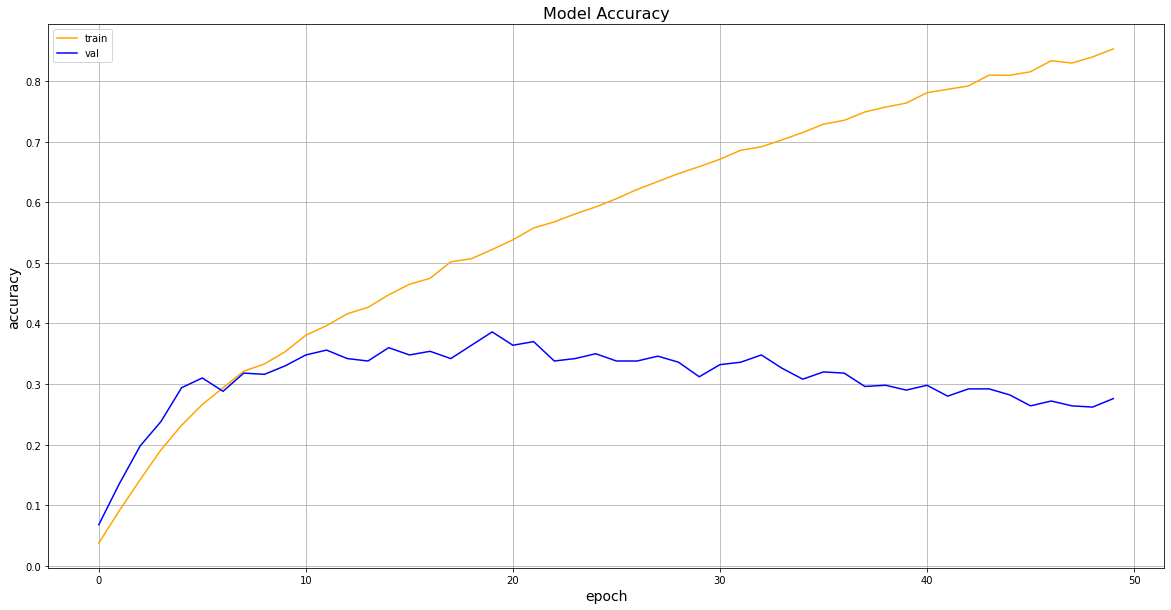

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(cnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

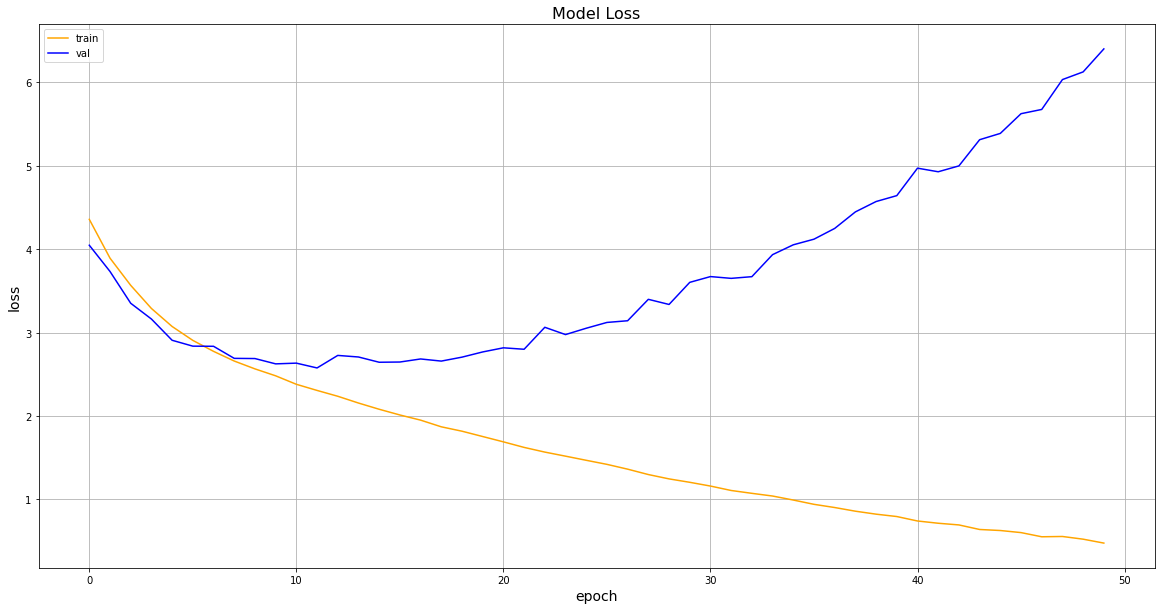

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_model_history.history['loss'], color='orange', label='train')
plt.plot(cnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

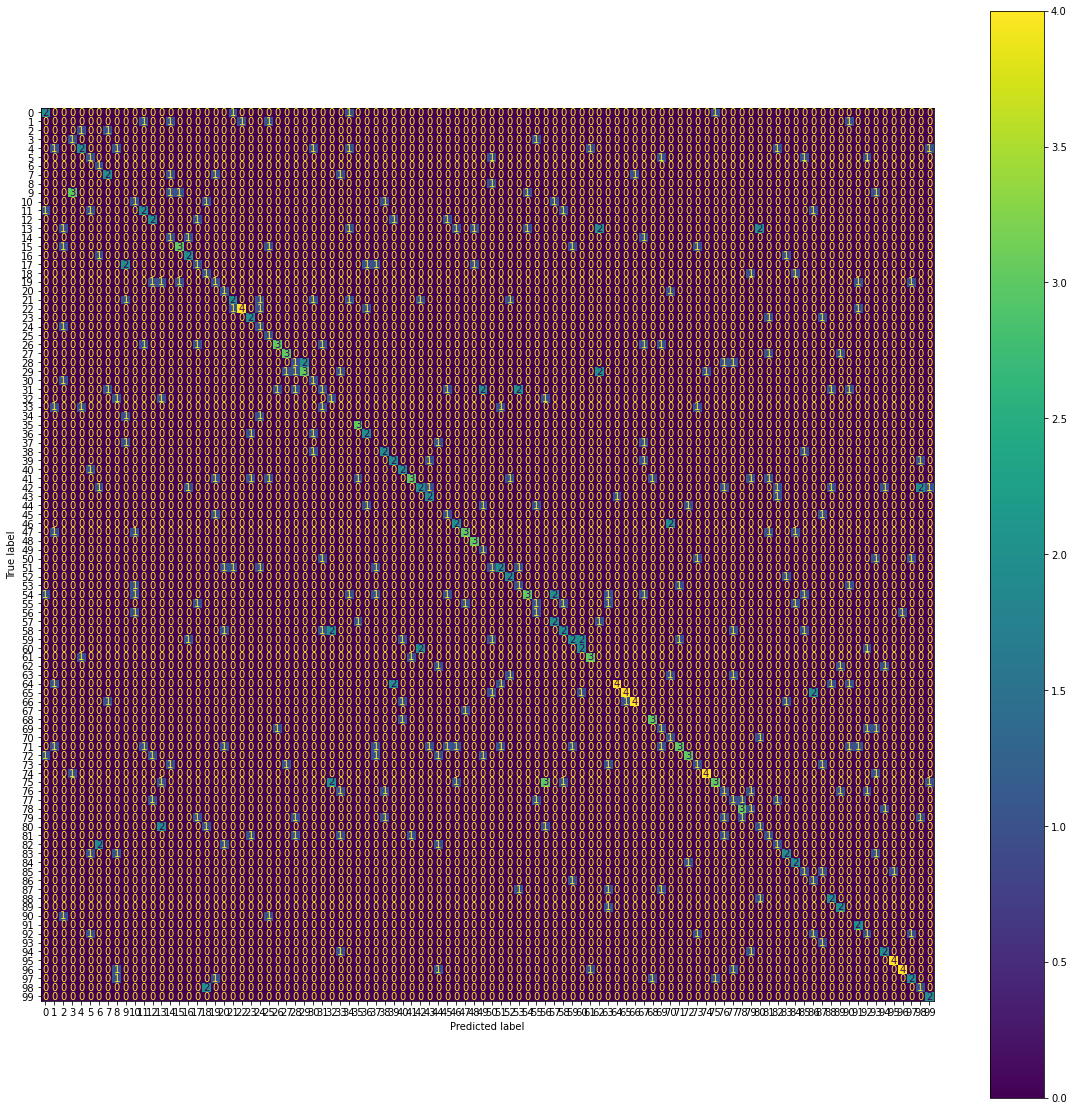

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in test_ds: 
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

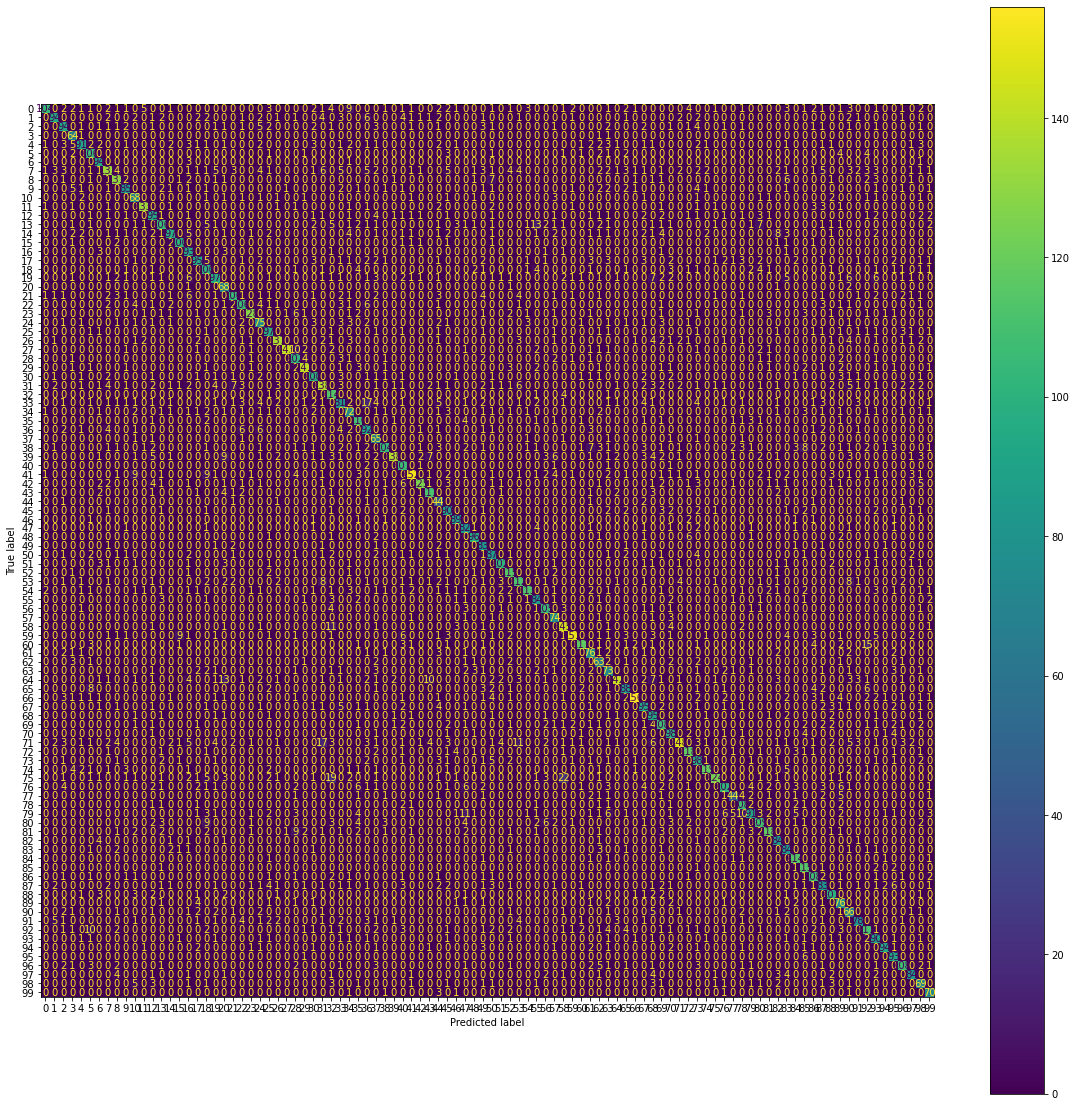

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in train_ds: 
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation="relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(100, activation="softmax"))

In [ ]:
cnn_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
cnn_model_history = cnn_model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=50
)
print(cnn_model_history.history)

Epoch 1/50
425/425 [==============================] - 33s 75ms/step - loss: 4.5914 - accuracy: 0.0139 - val_loss: 4.5584 - val_accuracy: 0.0260
Epoch 2/50
425/425 [==============================] - 28s 65ms/step - loss: 4.4890 - accuracy: 0.0241 - val_loss: 4.4055 - val_accuracy: 0.0360
Epoch 3/50
425/425 [==============================] - 28s 65ms/step - loss: 4.3364 - accuracy: 0.0373 - val_loss: 4.2534 - val_accuracy: 0.0660
Epoch 4/50
425/425 [==============================] - 28s 65ms/step - loss: 4.2197 - accuracy: 0.0468 - val_loss: 4.1437 - val_accuracy: 0.0660
Epoch 5/50
425/425 [==============================] - 27s 64ms/step - loss: 4.1241 - accuracy: 0.0575 - val_loss: 4.0391 - val_accuracy: 0.0700
Epoch 6/50
425/425 [==============================] - 27s 64ms/step - loss: 4.0432 - accuracy: 0.0740 - val_loss: 3.9820 - val_accuracy: 0.0840
Epoch 7/50
425/425 [==============================] - 28s 66ms/step - loss: 3.9836 - accuracy: 0.0778 - val_loss: 3.9064 - val_accuracy:

In [ ]:
cnn_model.evaluate(test_ds)

16/16 [==============================] - 1s 23ms/step - loss: 2.5764 - accuracy: 0.3340


[2.5763909816741943, 0.33399999141693115]

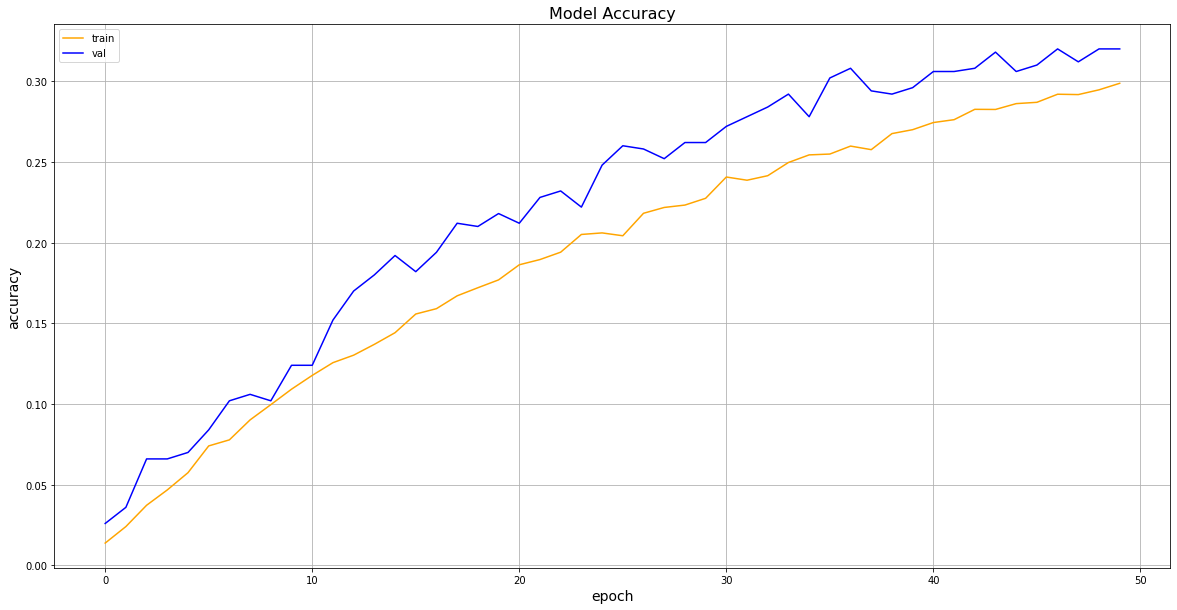

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(cnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

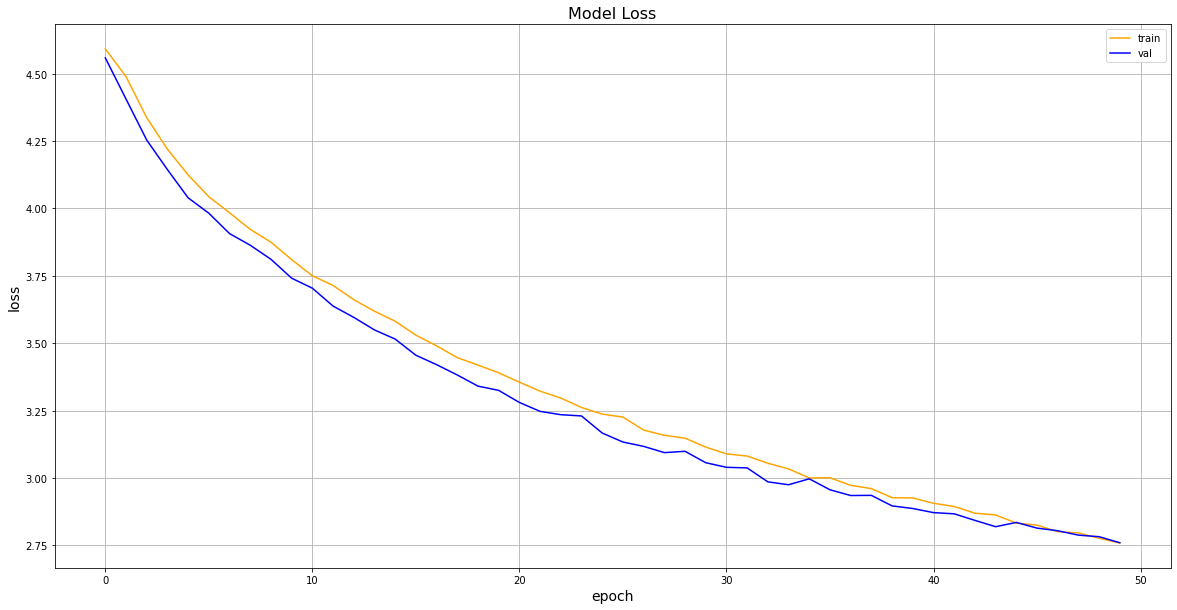

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_model_history.history['loss'], color='orange', label='train')
plt.plot(cnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

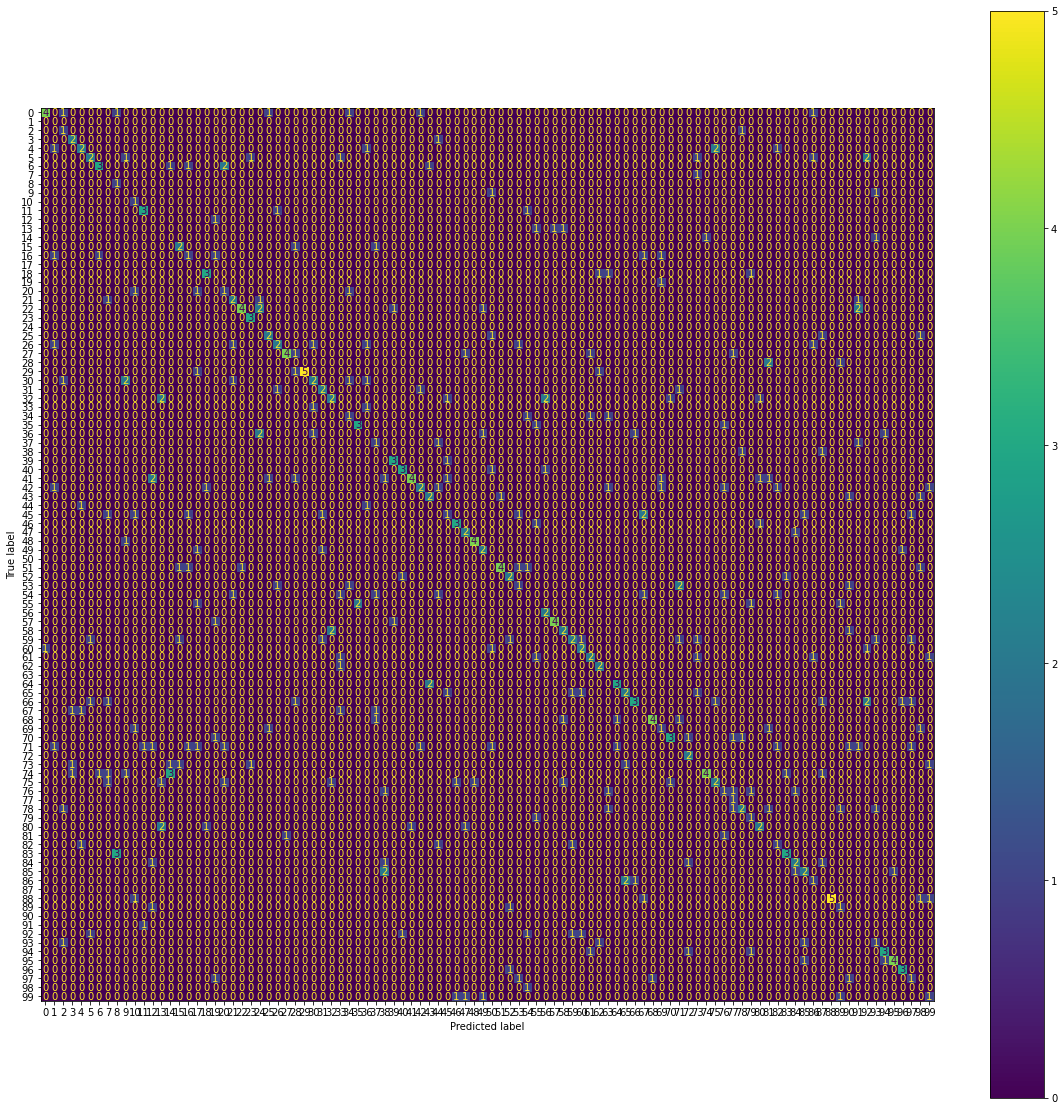

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in test_ds: 
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

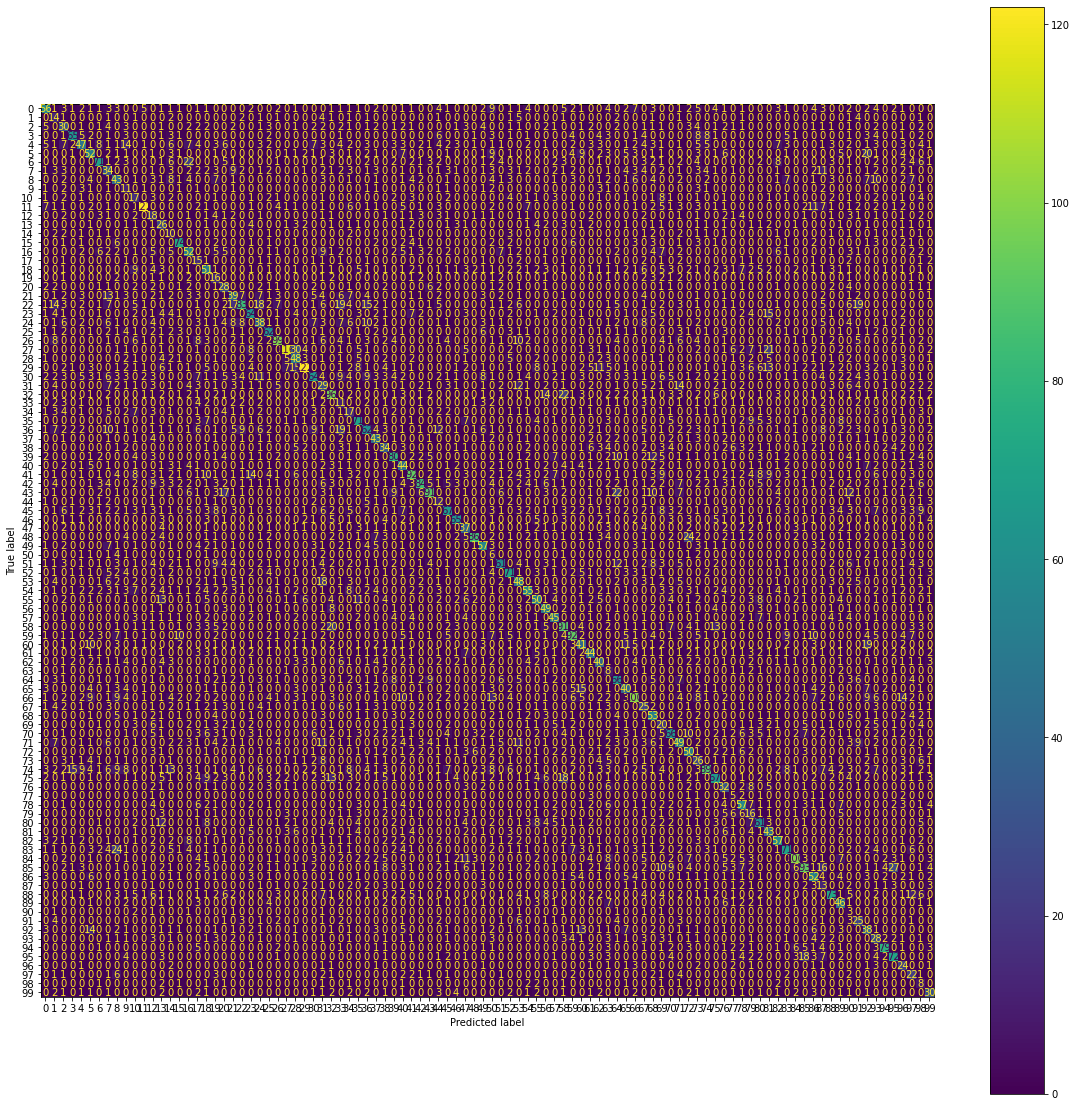

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in train_ds: 
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(256, activation="relu"))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(100, activation="softmax"))

In [ ]:
cnn_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn_model_history = cnn_model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=100
)
print(cnn_model_history.history)

Epoch 1/100
425/425 [==============================] - 30s 66ms/step - loss: 4.5860 - accuracy: 0.0130 - val_loss: 4.5234 - val_accuracy: 0.0260
Epoch 2/100
425/425 [==============================] - 29s 67ms/step - loss: 4.4108 - accuracy: 0.0302 - val_loss: 4.2375 - val_accuracy: 0.0500
Epoch 3/100
425/425 [==============================] - 31s 72ms/step - loss: 4.2179 - accuracy: 0.0540 - val_loss: 4.0184 - val_accuracy: 0.0900
Epoch 4/100
425/425 [==============================] - 30s 69ms/step - loss: 4.0628 - accuracy: 0.0737 - val_loss: 3.8628 - val_accuracy: 0.1160
Epoch 5/100
425/425 [==============================] - 30s 71ms/step - loss: 3.9490 - accuracy: 0.0875 - val_loss: 3.7454 - val_accuracy: 0.1560
Epoch 6/100
425/425 [==============================] - 28s 66ms/step - loss: 3.8392 - accuracy: 0.1046 - val_loss: 3.6534 - val_accuracy: 0.1700
Epoch 7/100
425/425 [==============================] - 28s 66ms/step - loss: 3.7499 - accuracy: 0.1188 - val_loss: 3.5426 - val_ac

In [ ]:
cnn_model.evaluate(test_ds)

16/16 [==============================] - 1s 24ms/step - loss: 2.2403 - accuracy: 0.4240


[2.2402634620666504, 0.42399999499320984]

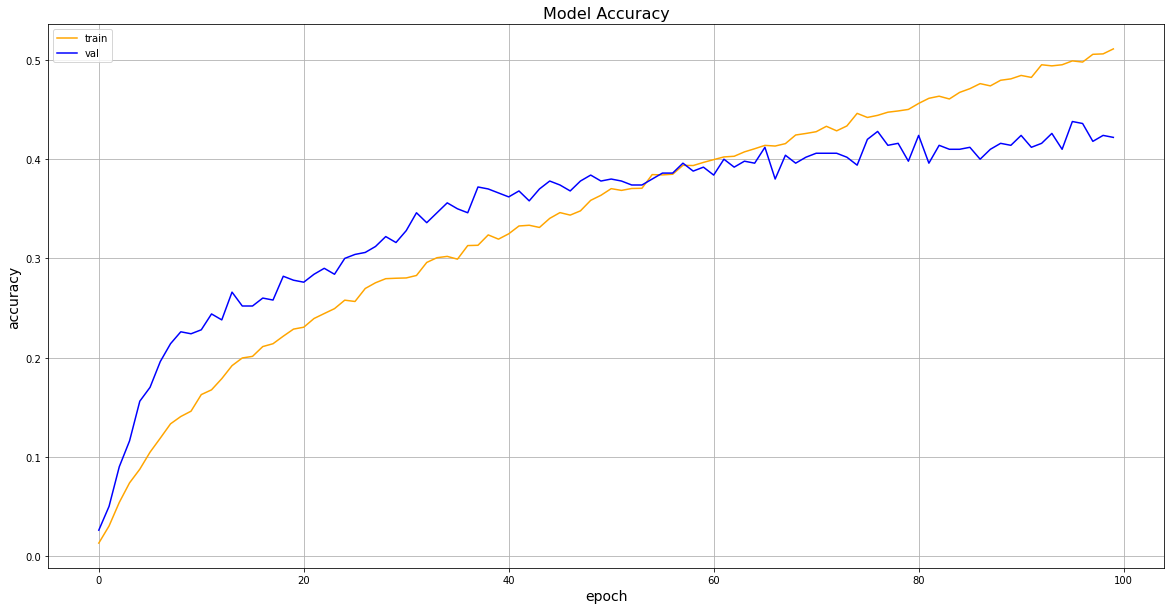

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(cnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

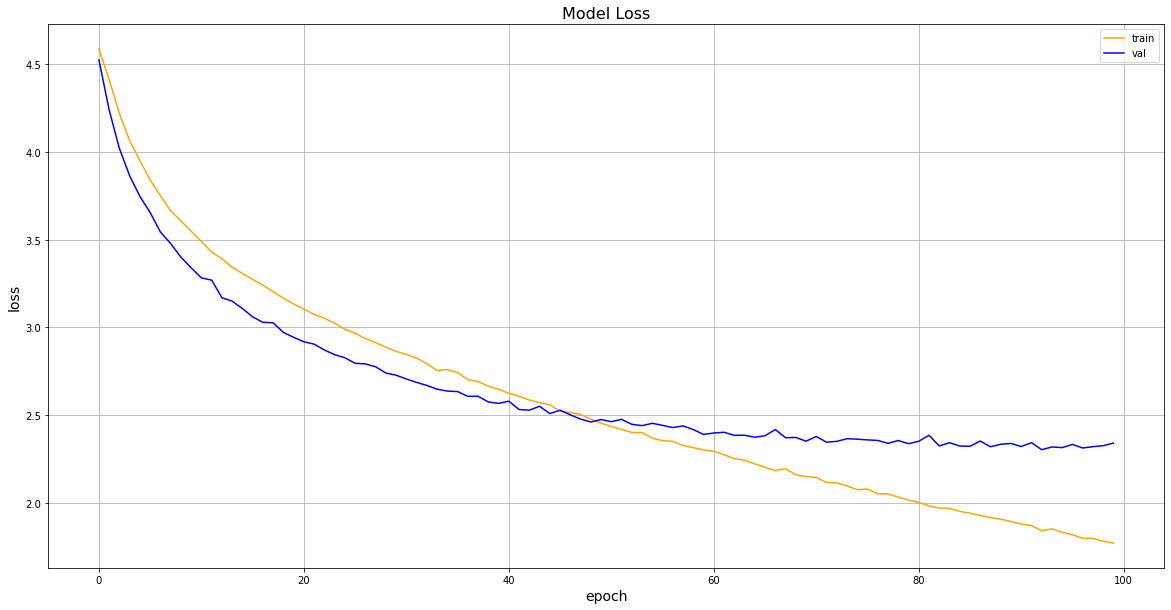

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_model_history.history['loss'], color='orange', label='train')
plt.plot(cnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

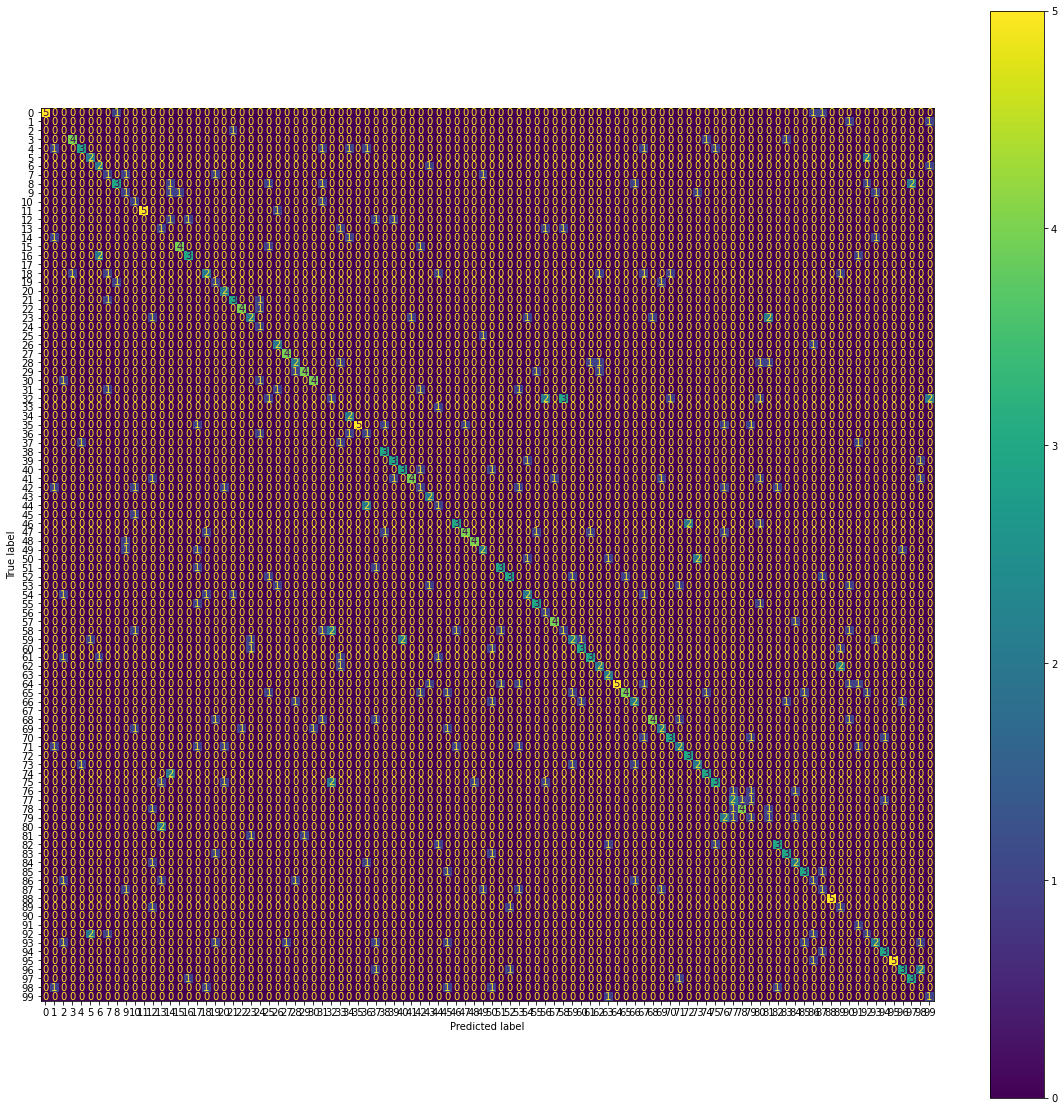

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in test_ds: 
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

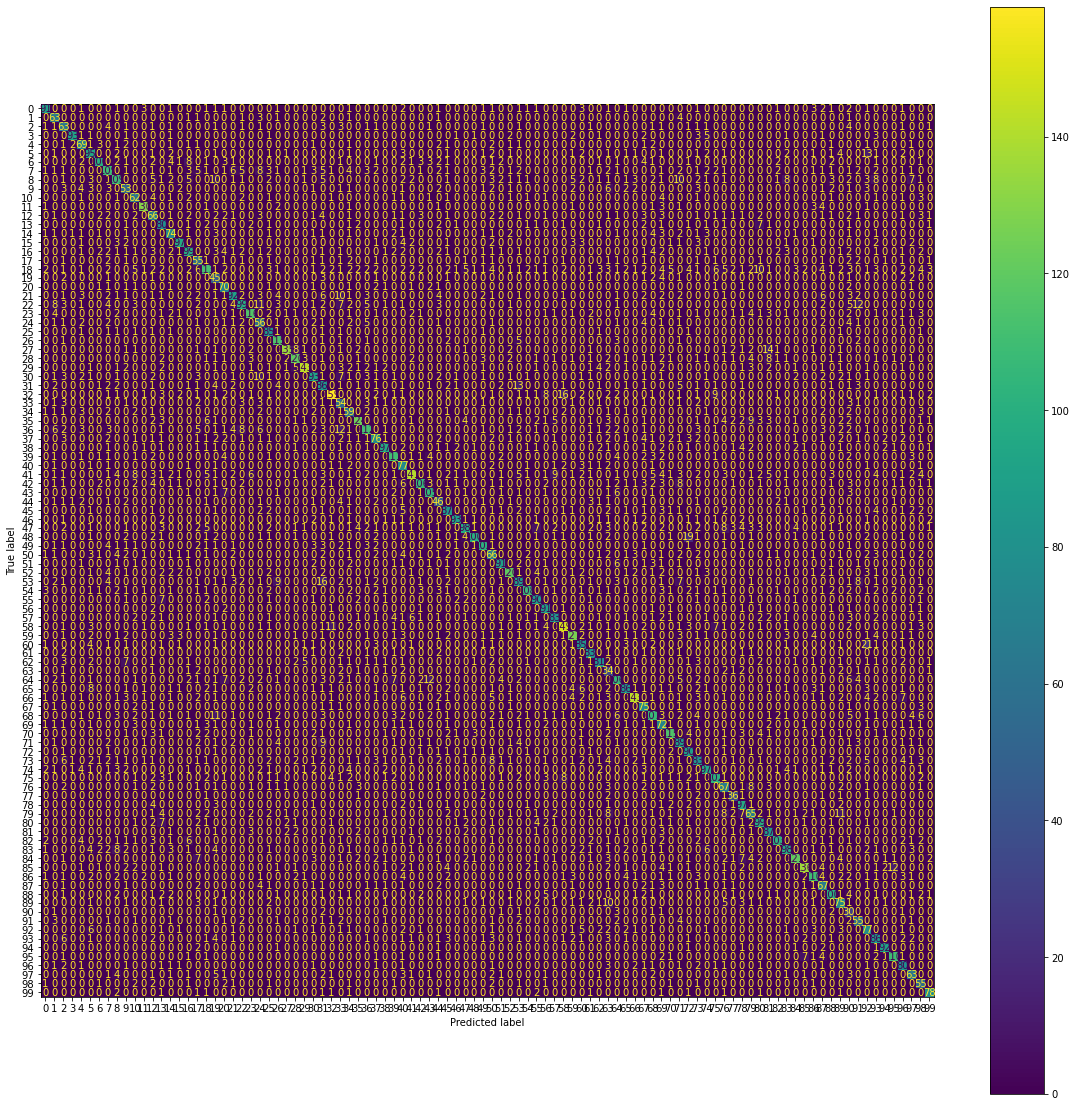

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in train_ds: 
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [ ]:
trans_train_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_train",
      image_size=(32, 32)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 13572 files belonging to 100 classes.


In [ ]:
trans_val_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_valid",
      image_size=(32, 32)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 500 files belonging to 100 classes.


In [ ]:
trans_test_ds = tf.keras.utils.image_dataset_from_directory(
      directory="z3_test",
      image_size=(32, 32)
).map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

Found 500 files belonging to 100 classes.


In [ ]:
vgg19_backbone_cnn_model = tf.keras.applications.vgg19.VGG19(
      weights='imagenet', 
      include_top=False, 
      input_shape = (32, 32, 3)
)

for layer in vgg19_backbone_cnn_model.layers:
  layer.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
transfer_cnn_model = models.Sequential()
transfer_cnn_model.add(vgg19_backbone_cnn_model)
transfer_cnn_model.add(layers.Flatten())
transfer_cnn_model.add(layers.Dense(128, activation="relu"))
transfer_cnn_model.add(layers.Dropout(0.2))
transfer_cnn_model.add(layers.Dense(100, activation="softmax"))

In [ ]:
transfer_cnn_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
)
transfer_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
Total params: 20,102,948
Trainable params: 78,564
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
transfer_cnn_model_history = transfer_cnn_model.fit(
      trans_train_ds,
      validation_data=trans_val_ds,
      epochs=50
)
print(transfer_cnn_model_history.history)

Epoch 1/50
425/425 [==============================] - 221s 518ms/step - loss: 3.9657 - accuracy: 0.1082 - val_loss: 3.2929 - val_accuracy: 0.1980
Epoch 2/50
425/425 [==============================] - 214s 503ms/step - loss: 3.3168 - accuracy: 0.1945 - val_loss: 2.9700 - val_accuracy: 0.2460
Epoch 3/50
425/425 [==============================] - 218s 513ms/step - loss: 3.0731 - accuracy: 0.2389 - val_loss: 2.8073 - val_accuracy: 0.3140
Epoch 4/50
425/425 [==============================] - 220s 518ms/step - loss: 2.9366 - accuracy: 0.2664 - val_loss: 2.6939 - val_accuracy: 0.3400
Epoch 5/50
425/425 [==============================] - 221s 519ms/step - loss: 2.8274 - accuracy: 0.2913 - val_loss: 2.6386 - val_accuracy: 0.3620
Epoch 6/50
425/425 [==============================] - 221s 519ms/step - loss: 2.7449 - accuracy: 0.3045 - val_loss: 2.5802 - val_accuracy: 0.3640
Epoch 7/50
425/425 [==============================] - 219s 516ms/step - loss: 2.6757 - accuracy: 0.3200 - val_loss: 2.5421 -

In [ ]:
transfer_cnn_model.evaluate(trans_test_ds)

16/16 [==============================] - 8s 455ms/step - loss: 2.5896 - accuracy: 0.3960


[2.589566230773926, 0.3959999978542328]

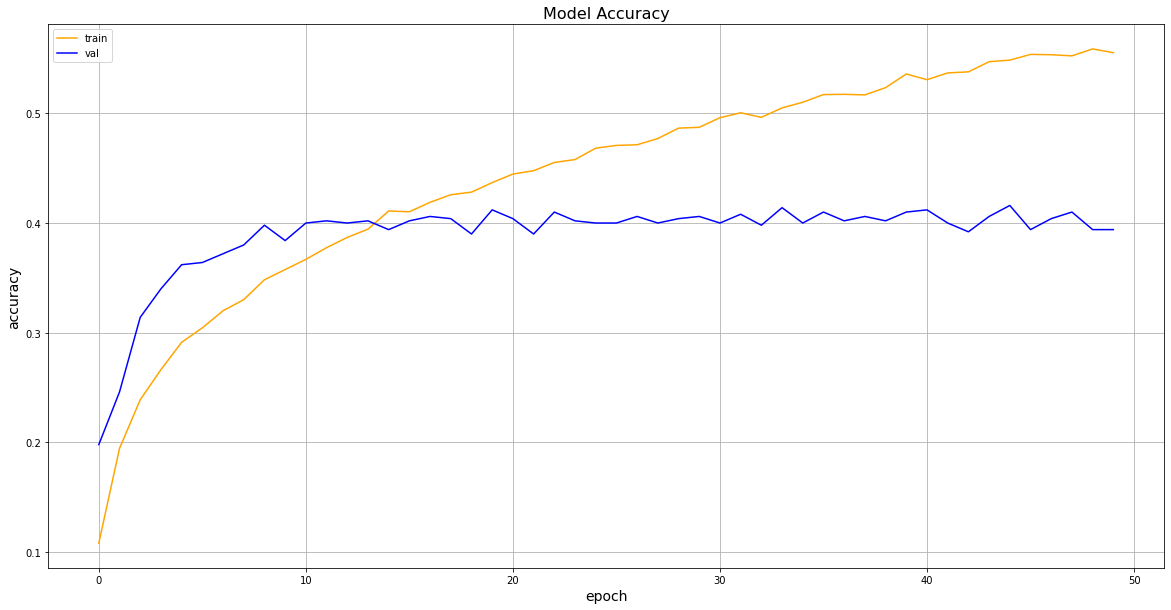

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(transfer_cnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(transfer_cnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

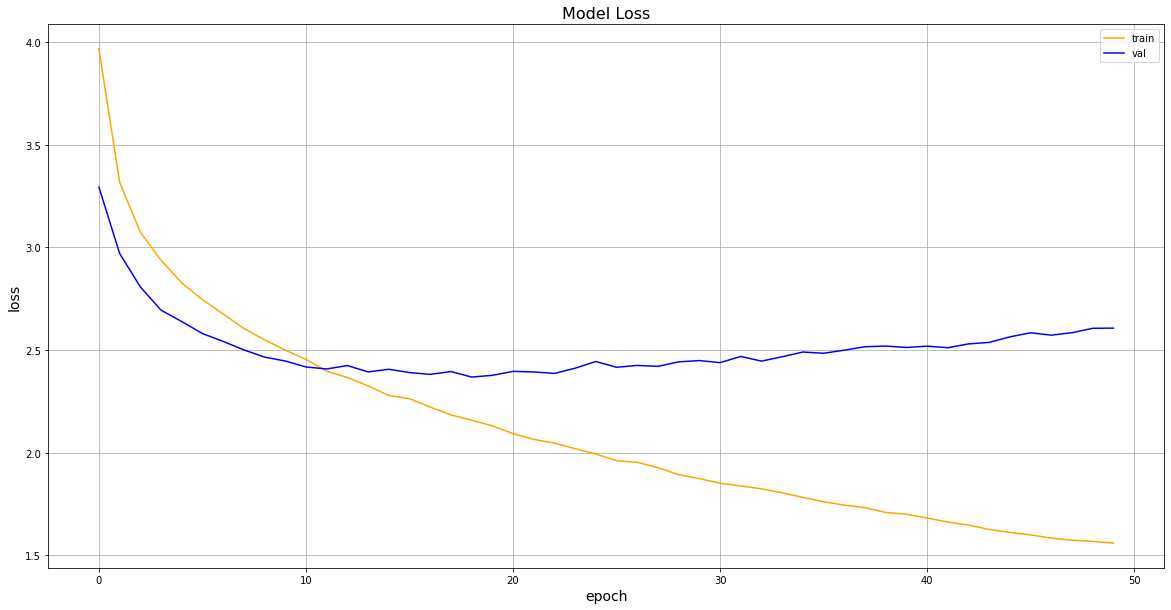

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(transfer_cnn_model_history.history['loss'], color='orange', label='train')
plt.plot(transfer_cnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

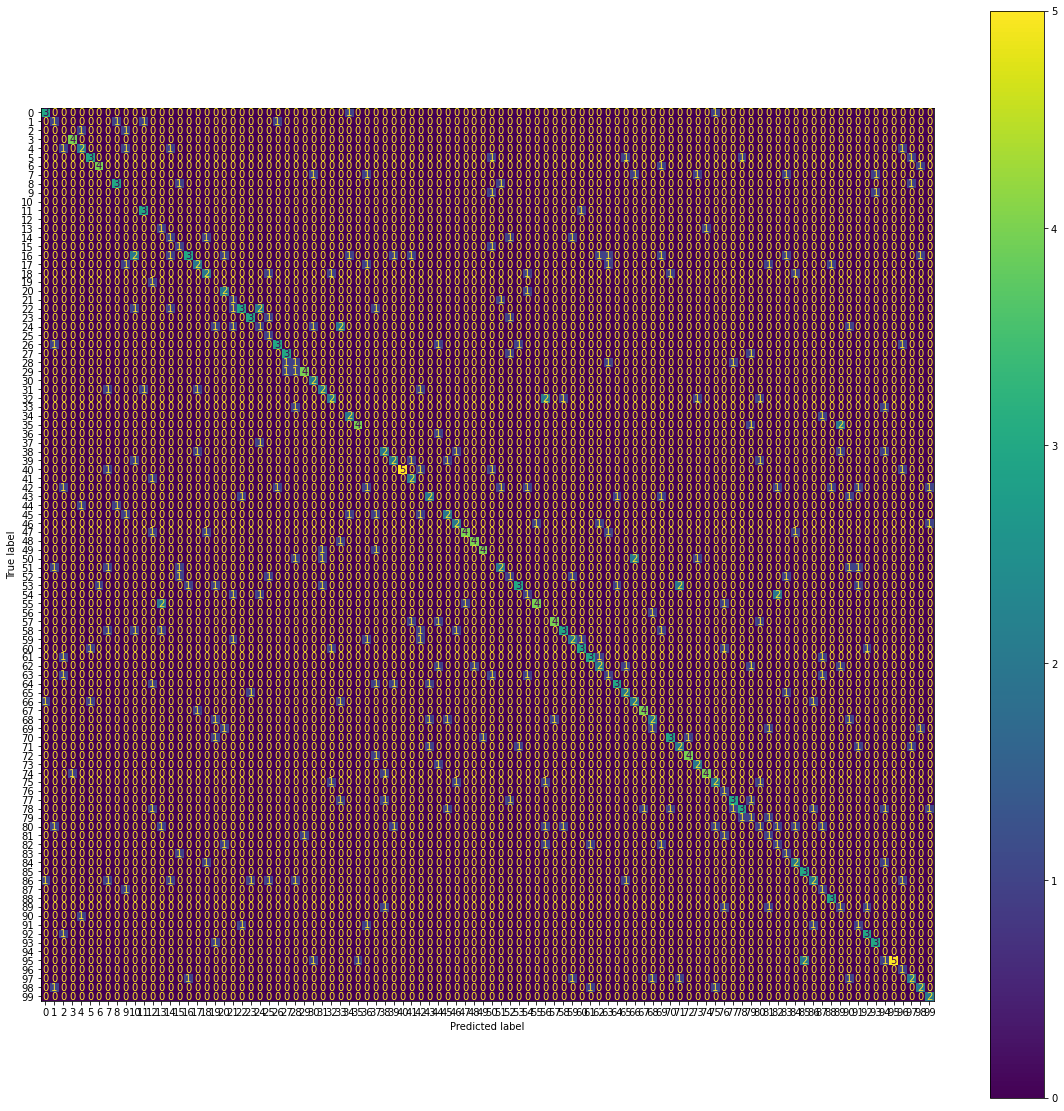

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in trans_test_ds: 
   y_true.append(label_batch)
   preds = transfer_cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

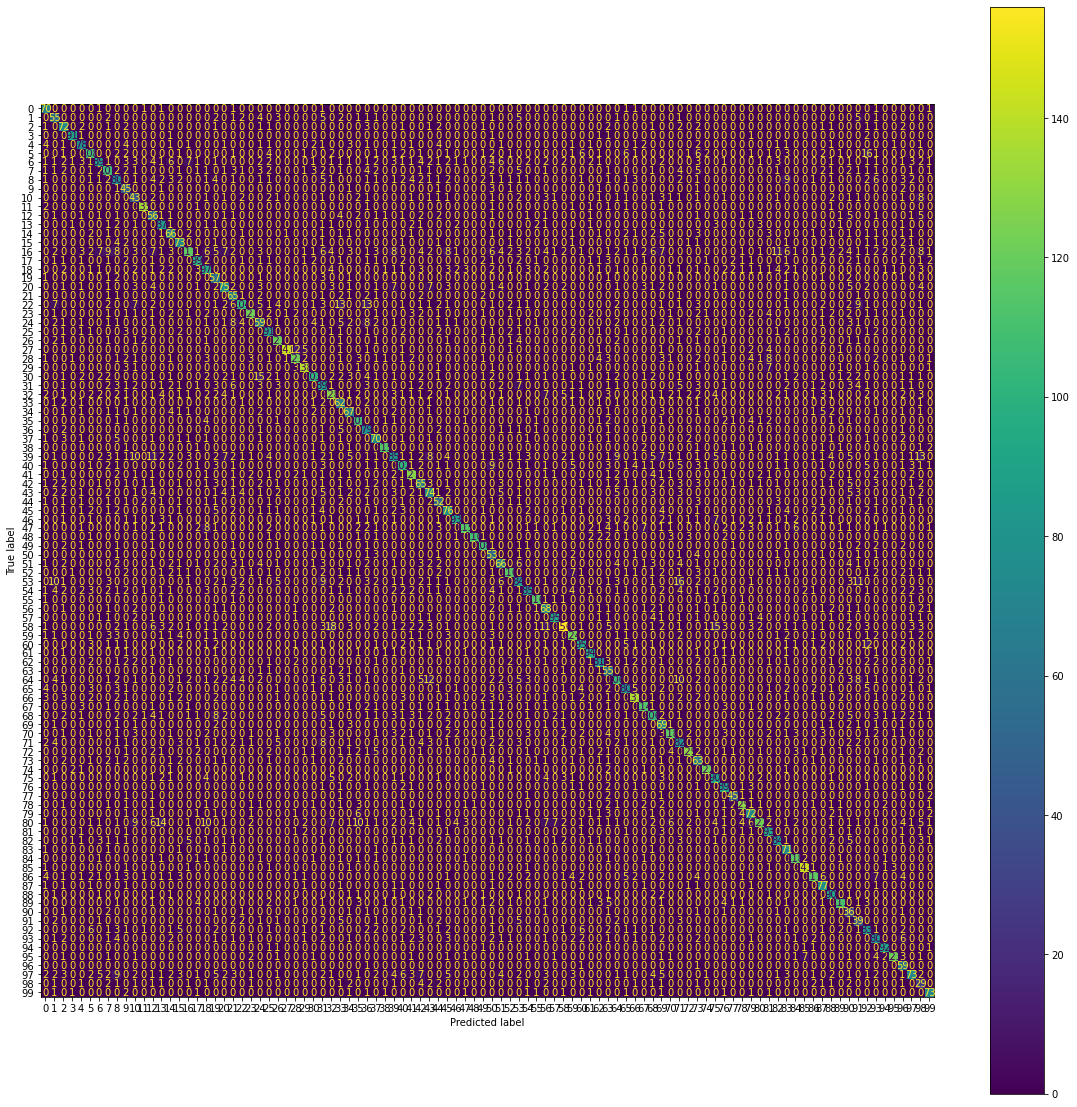

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in trans_train_ds: 
   y_true.append(label_batch)
   preds = transfer_cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [ ]:
transfer_cnn_model = models.Sequential()
transfer_cnn_model.add(vgg19_backbone_cnn_model)
transfer_cnn_model.add(layers.Flatten())
transfer_cnn_model.add(layers.Dense(128, activation="relu"))
transfer_cnn_model.add(layers.Dropout(0.5))
transfer_cnn_model.add(layers.Dense(100, activation="softmax"))

In [ ]:
transfer_cnn_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
)
transfer_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
Total params: 20,102,948
Trainable params: 78,564
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
transfer_cnn_model_history = transfer_cnn_model.fit(
      trans_train_ds,
      validation_data=trans_val_ds,
      epochs=10
)
print(transfer_cnn_model_history.history)

Epoch 1/10
425/425 [==============================] - 191s 446ms/step - loss: 4.1907 - accuracy: 0.0698 - val_loss: 3.5572 - val_accuracy: 0.1540
Epoch 2/10
425/425 [==============================] - 190s 447ms/step - loss: 3.6191 - accuracy: 0.1439 - val_loss: 3.1723 - val_accuracy: 0.2380
Epoch 3/10
425/425 [==============================] - 189s 443ms/step - loss: 3.3848 - accuracy: 0.1810 - val_loss: 3.0115 - val_accuracy: 0.2720
Epoch 4/10
425/425 [==============================] - 188s 442ms/step - loss: 3.2366 - accuracy: 0.2017 - val_loss: 2.9209 - val_accuracy: 0.2820
Epoch 5/10
425/425 [==============================] - 188s 441ms/step - loss: 3.1548 - accuracy: 0.2220 - val_loss: 2.8343 - val_accuracy: 0.3320
Epoch 6/10
425/425 [==============================] - 188s 441ms/step - loss: 3.0811 - accuracy: 0.2317 - val_loss: 2.7557 - val_accuracy: 0.3240
Epoch 7/10
425/425 [==============================] - 187s 439ms/step - loss: 3.0418 - accuracy: 0.2418 - val_loss: 2.7159 -

In [ ]:
transfer_cnn_model.evaluate(trans_test_ds)

16/16 [==============================] - 7s 399ms/step - loss: 2.5564 - accuracy: 0.3600


[2.556384325027466, 0.36000001430511475]

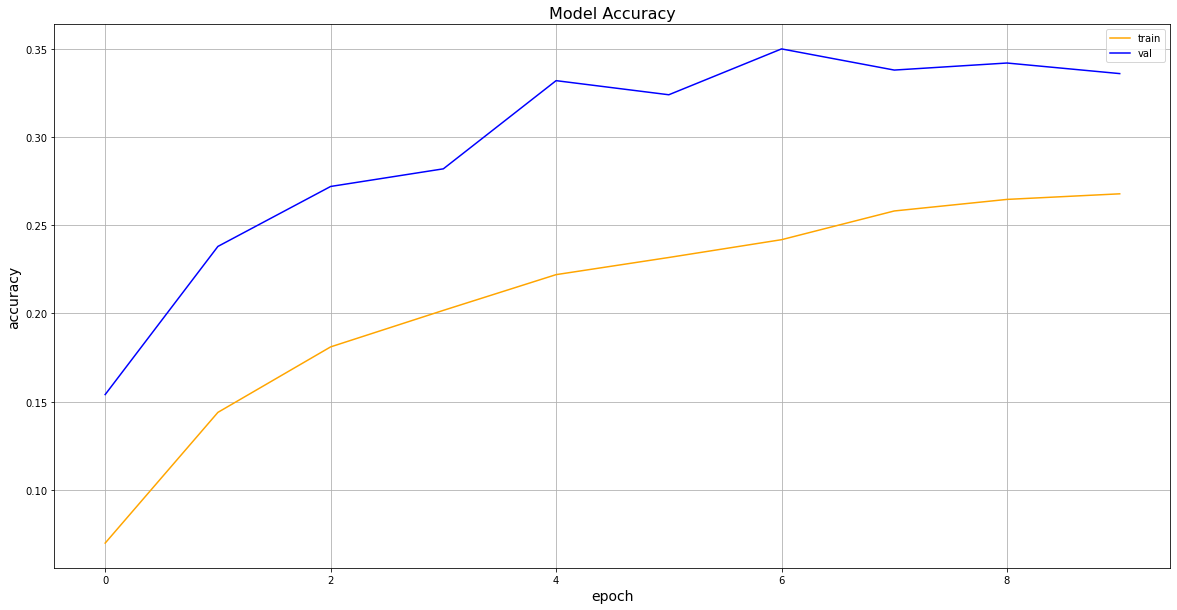

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(transfer_cnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(transfer_cnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

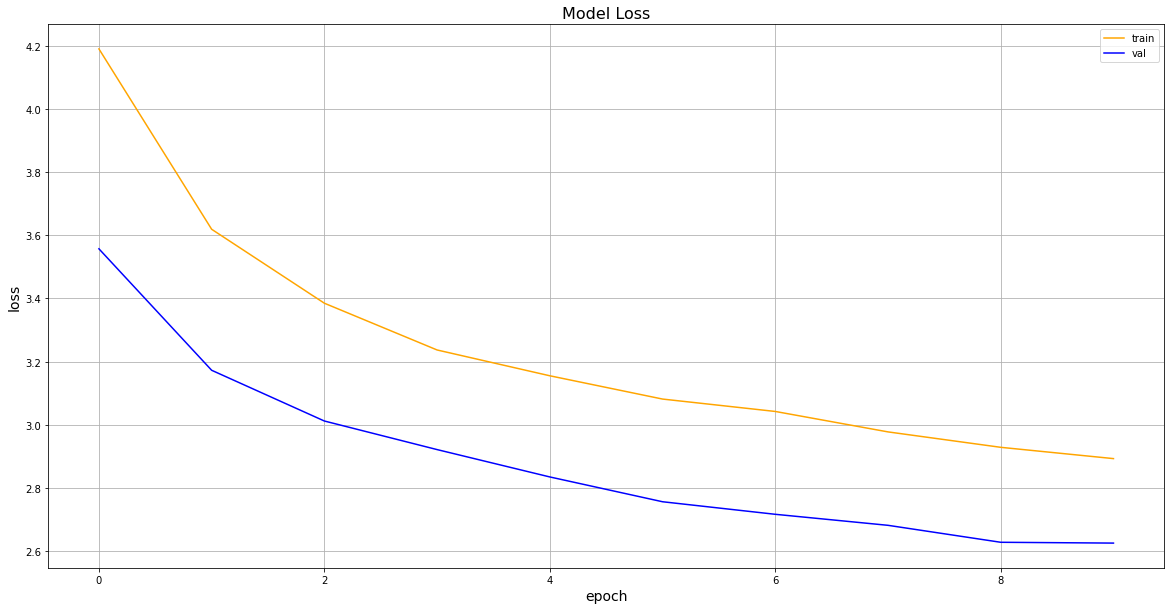

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(transfer_cnn_model_history.history['loss'], color='orange', label='train')
plt.plot(transfer_cnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

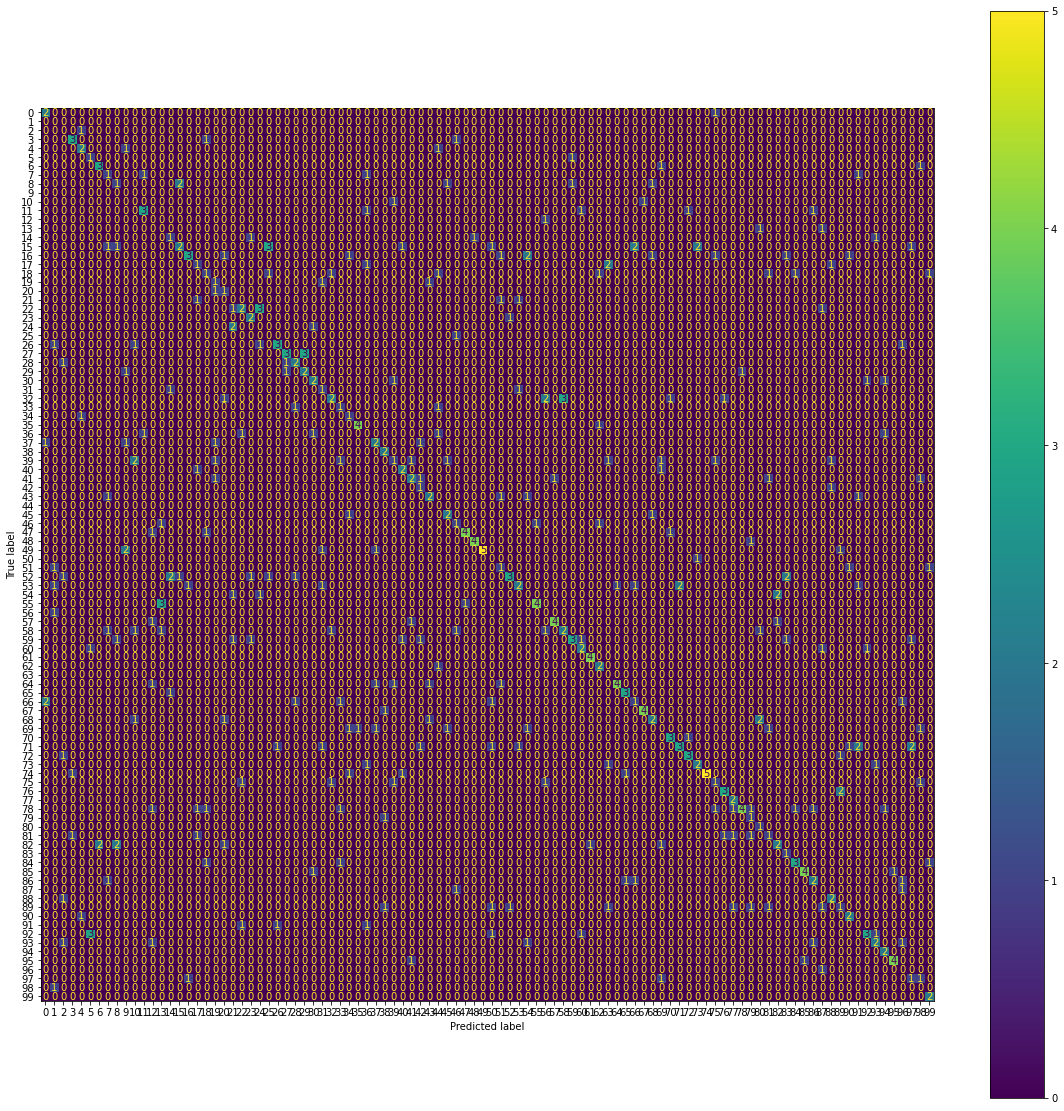

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in trans_test_ds: 
   y_true.append(label_batch)
   preds = transfer_cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

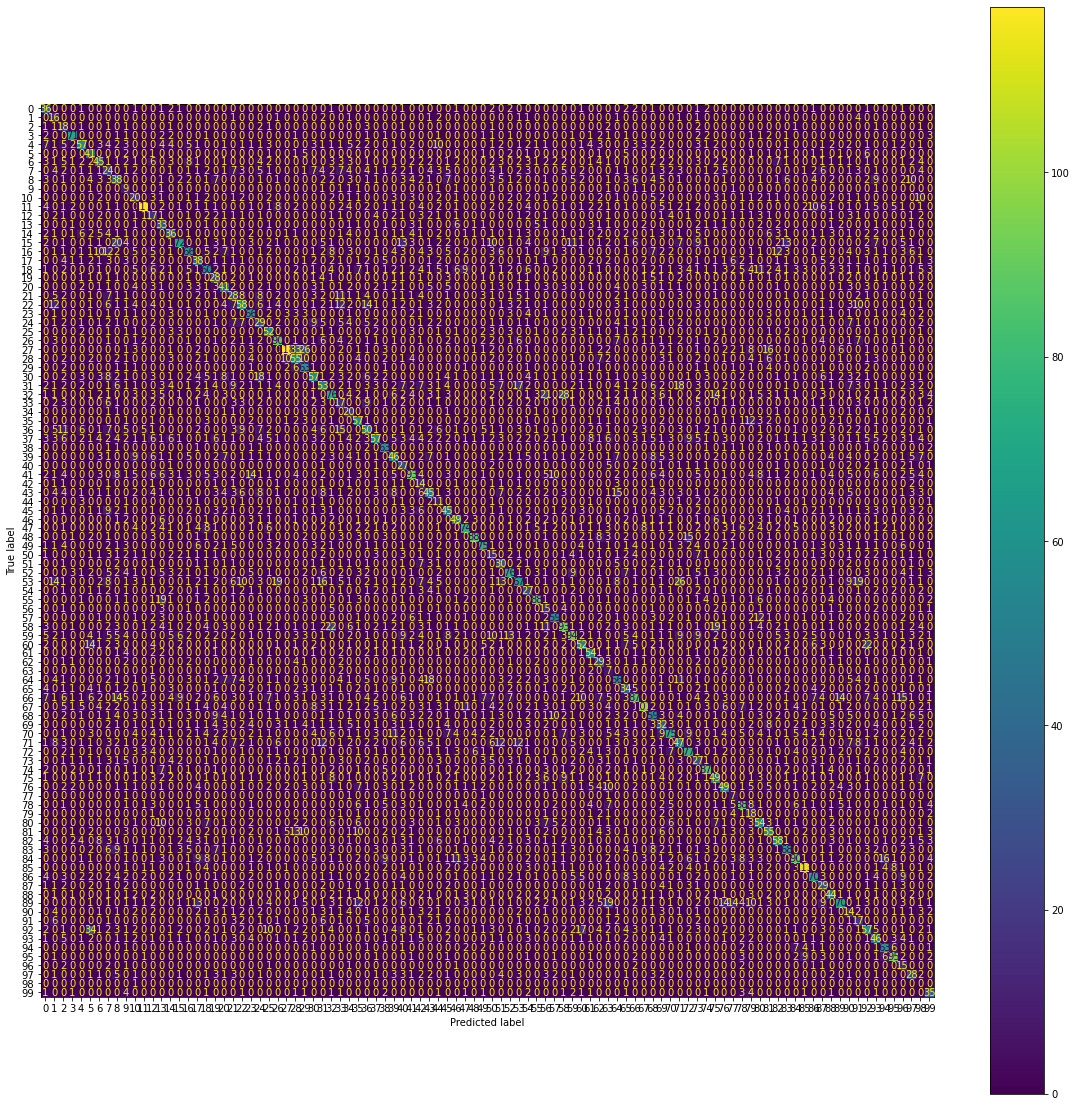

In [ ]:
"""***************************************************************************************
*    Title: How to extract classes from prefetched dataset in Tensorflow for confusion matrix
*    Author: Ankit Kumar Saini
*    Date: 7.5.2021
*    Availability: https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri
***************************************************************************************"""

y_pred = []
y_true = []

for image_batch, label_batch in trans_train_ds: 
   y_true.append(label_batch)
   preds = transfer_cnn_model.predict(image_batch, verbose=0)
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cmp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(predicted_labels, correct_labels))
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [ ]:
"""***************************************************************************************
*    Title: Guide to Visualize Filters and Feature Maps in CNN
*    Author: Arpit Jain
*    Date: 2019
*    Availability: https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
***************************************************************************************"""

for layer in cnn_model.layers:
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 64)


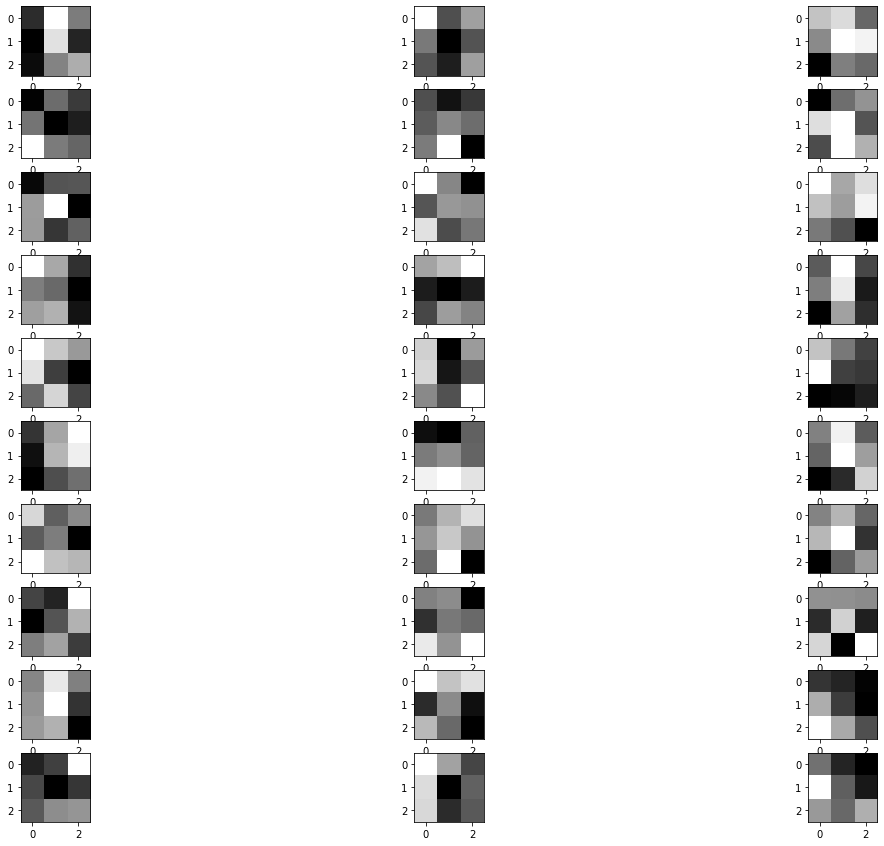

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 10
ix = 1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j], cmap='gray')
        ix += 1
plt.show()

In [ ]:
"""***************************************************************************************
*    Title: Guide to Visualize Filters and Feature Maps in CNN
*    Author: Arpit Jain
*    Date: 2019
*    Availability: https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
***************************************************************************************"""

image = load_img("/content/z3_train/snow boarding/002.jpg" , target_size=(28, 28))
image = img_to_array(image)
image = expand_dims(image, axis=0)
image = preprocess_input(image)

1/1 [==============================] - 0s 38ms/step


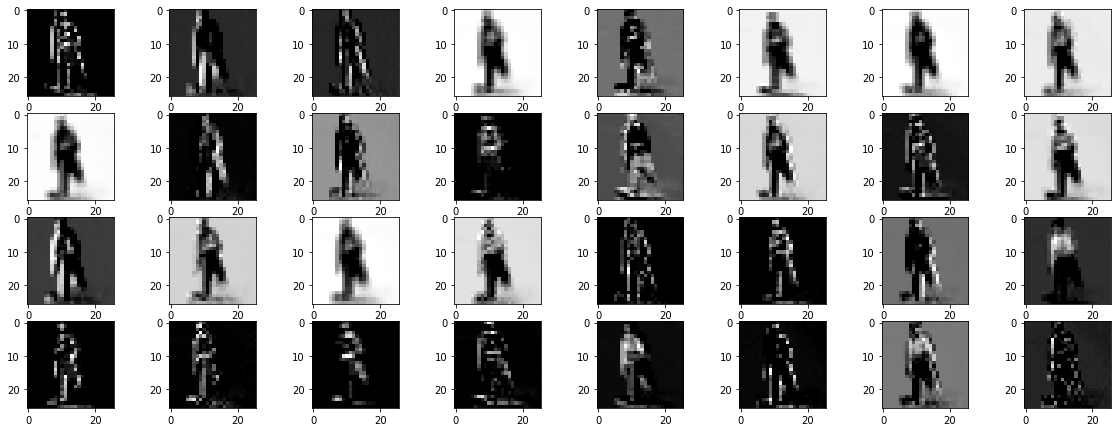

In [ ]:
"""***************************************************************************************
*    Title: Guide to Visualize Filters and Feature Maps in CNN
*    Author: Arpit Jain
*    Date: 2019
*    Availability: https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
***************************************************************************************"""

model = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[0].output)

features = model.predict(image)
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()

1/1 [==============================] - 0s 56ms/step


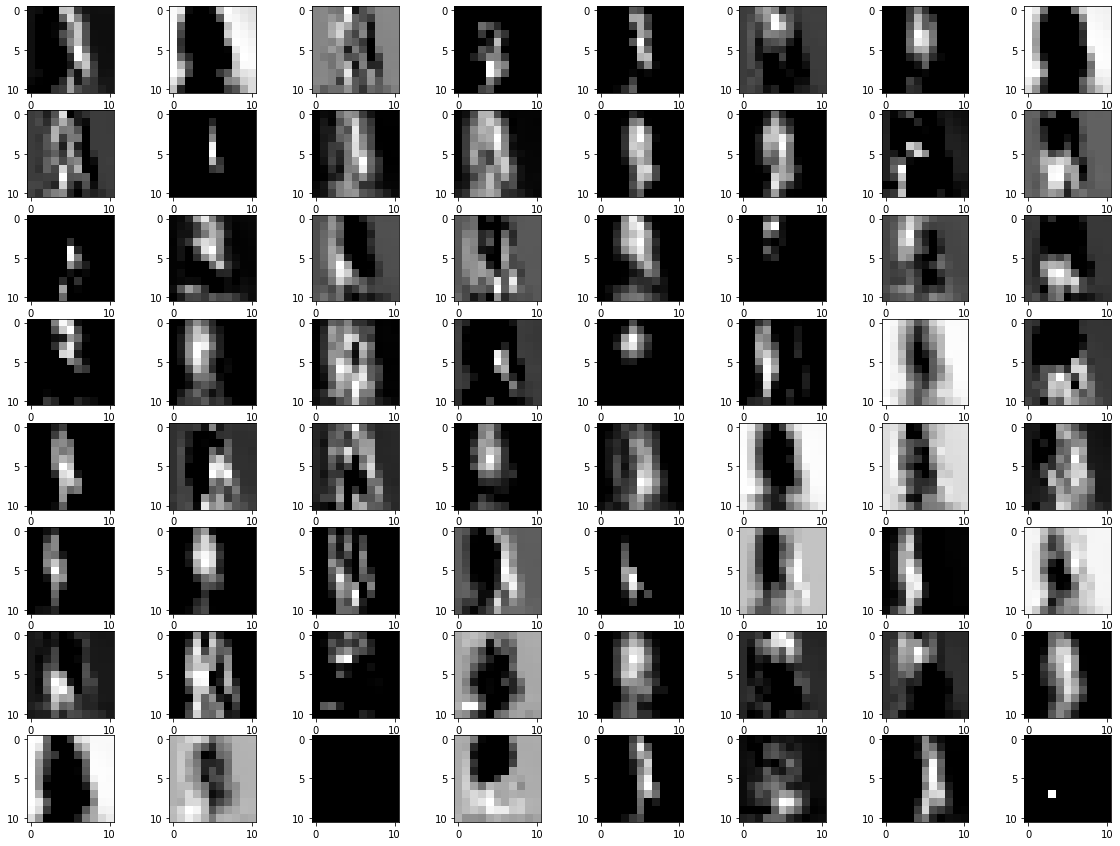

In [ ]:
"""***************************************************************************************
*    Title: Guide to Visualize Filters and Feature Maps in CNN
*    Author: Arpit Jain
*    Date: 2019
*    Availability: https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
***************************************************************************************"""

model = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[2].output)

features = model.predict(image)
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()

1/1 [==============================] - 0s 91ms/step


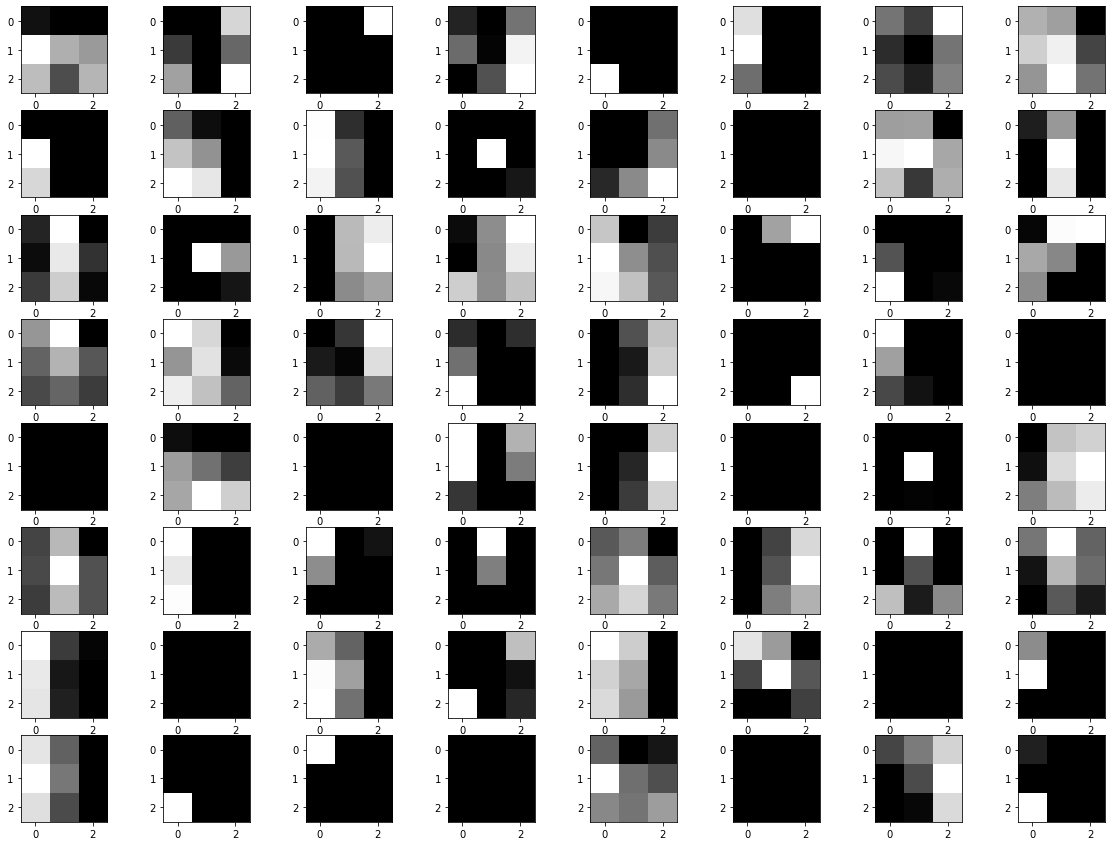

In [ ]:
"""***************************************************************************************
*    Title: Guide to Visualize Filters and Feature Maps in CNN
*    Author: Arpit Jain
*    Date: 2019
*    Availability: https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
***************************************************************************************"""

model = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[4].output)

features = model.predict(image)
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()